In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns


pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 200)

In [2]:
# Test scores!
# 4th grader 2004
df = pd.read_csv("cfy04e4.dat", usecols=['r_all_rs', 'CNAME', 'CAMPUS'])
df = df.set_index('CAMPUS').add_suffix('_fourth')
df.head(3)

,CNAME_fourth,r_all_rs_fourth
CAMPUS,,
1902103,CAYUGA EL,2392.0
1903101,ELKHART EL,2263.0
1904102,FRANKSTON EL,2242.0


In [3]:
# These are the schools that did the BEST job
# r_all_rs_fourth - reading scores

df.sort_values(by='r_all_rs_fourth', ascending=False).head(10)

,CNAME_fourth,r_all_rs_fourth
CAMPUS,,
131001103,SARITA EL,2509.0
101912296,T H ROGERS EL,2480.0
57905115,HARRELL BUDD EL,2470.0
180901101,MIMI FARLEY ELE,2448.0
68901118,EL MAGNET AT RE,2432.0
57909122,WALNUT GLEN ACA,2430.0
57916123,PRAIRIE CREEK E,2426.0
57916128,BRENTFIELD EL,2425.0
57911102,BRADFIELD ELEME,2425.0


In [4]:
third_graders = pd.read_csv("cfy03e3.dat", usecols=['CAMPUS', 'r_all_rs'])
third_graders = third_graders.set_index('CAMPUS').add_suffix('_third')
merged = df.join(third_graders)
merged = merged.dropna()
merged

,CNAME_fourth,r_all_rs_fourth,r_all_rs_third
CAMPUS,,,
1902103,CAYUGA EL,2392.0,2330.0
1903101,ELKHART EL,2263.0,2285.0
1904102,FRANKSTON EL,2242.0,2299.0
1906102,NECHES EL,2218.0,2236.0
1907110,STORY EL,2200.0,2202.0
...,...,...,...
252903101,OLNEY EL,2193.0,2203.0
253901101,BENAVIDES EL,2109.0,2090.0
253901106,ZAPATA SOUTH EL,2172.0,2111.0


In [5]:
# Test scores!
third_2004_df = pd.read_csv("cfy04e3.dat", usecols=['r_all_rs', 'CNAME', 'CAMPUS'])
third_2004_df = third_2004_df.set_index('CAMPUS').add_suffix('_third_2004')
merged = merged.join(third_2004_df)
merged = merged.dropna()
merged.head(3)

,CNAME_fourth,r_all_rs_fourth,r_all_rs_third,CNAME_third_2004,r_all_rs_third_2004
CAMPUS,,,,,
1902103,CAYUGA EL,2392.0,2330.0,CAYUGA EL,2410.0
1903101,ELKHART EL,2263.0,2285.0,ELKHART EL,2256.0
1904102,FRANKSTON EL,2242.0,2299.0,FRANKSTON EL,2284.0


<AxesSubplot:xlabel='r_all_rs_third', ylabel='r_all_rs_fourth'>

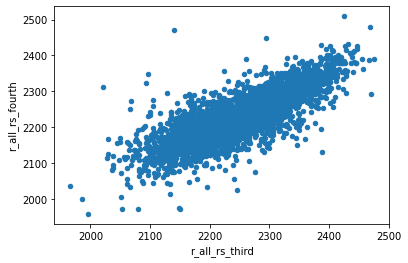

In [32]:
merged.plot('r_all_rs_third','r_all_rs_fourth',kind='scatter')

/home/abitporu/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='r_all_rs_third', ylabel='r_all_rs_fourth'>

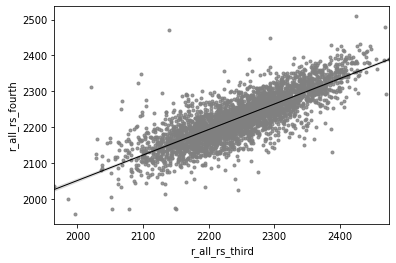

In [46]:
# Easier to draw a trendline with Seaborn

# sns.regplot?

sns.regplot('r_all_rs_third','r_all_rs_fourth',
        data = merged, 
        line_kws={'color': 'black', 'linewidth': 1 }, scatter_kws={'color': 'grey'},marker='.') # marker . creates a dot. ^ creates a triangle

/home/abitporu/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


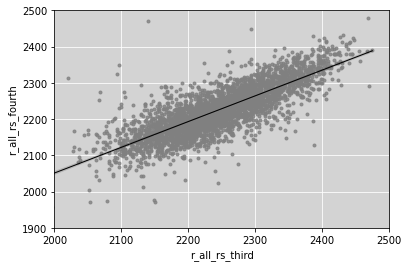

In [45]:

ax = sns.regplot('r_all_rs_third','r_all_rs_fourth',
        data = merged, 
        line_kws={'color': 'black', 'linewidth': 1 }, scatter_kws={'color': 'grey'},marker='.') 

ax.set_xlim(2000, 2500)
ax.set_ylim(1900, 2500)
ax.set_facecolor('lightgrey')
ax.grid(True, color='white')
ax.set_axisbelow(True)

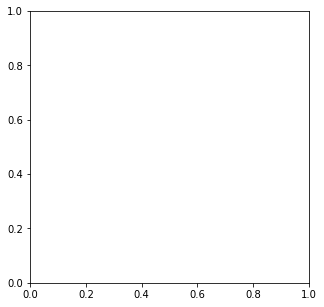

In [47]:
# Tell matplotlib to make an empty graphic
fig, ax = plt.subplots(figsize=(5,5))


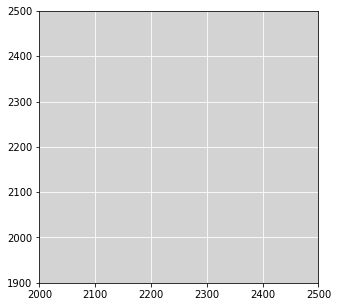

In [53]:
# Set some options on it
ax.set_xlim(2000, 2500)
ax.set_ylim(1900, 2500)
ax.set_facecolor('lightgrey')
ax.grid(True, color='white')
ax.set_axisbelow(True) # ??

fig

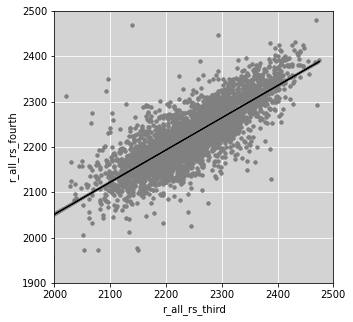

In [56]:

# Draw a graph inside of that empty graph space
sns.regplot(x='r_all_rs_third',
            y='r_all_rs_fourth',
            data=merged,
            marker='.',
            line_kws={'color': 'black', 'linewidth': 1 },
            scatter_kws={'color': 'grey'},
            ax=ax)

fig

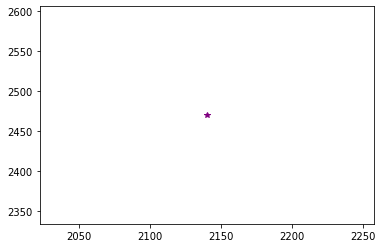

In [57]:

# Draw another graph ON TOP OF the existing graph
#plt.plot(2140, 2470, color='red', marker='o')

# or! we can pull out of datapoint
highlight = merged.loc[57905115]
plt.plot(highlight.r_all_rs_third, highlight.r_all_rs_fourth, color='purple', marker='*')

In [34]:
# Let's see how well the third grade score predicts
# the fourth grade score
model = smf.ols("""
    r_all_rs_fourth ~ r_all_rs_third
""", data=merged)

results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        r_all_rs_fourth   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     6389.
Date:                Wed, 11 Aug 2021   Prob (F-statistic):               0.00
Time:                        01:57:19   Log-Likelihood:                -17854.
No. Observations:                3482   AIC:                         3.571e+04
Df Residuals:                    3480   BIC:                         3.572e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        630.7280     19.994     31.545      0.000     591.526     669.930
r_all_rs_third     0.7103      0.009     79.930      0.000       0.693       0.728
==============================================================================
Omnibus:                      264.073   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1336.132
Skew:                           0.145   Prob(JB):                    7.29e-291
Kurtosis:                       6.021   Cond. No.                     6.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
results.predict()

array([2285.74192229, 2253.77813352, 2263.72242336, ..., 2130.18481696,
       2109.58593086, 2196.24331374])

In [36]:
# results.predict() will give us the prediction
merged['predicted_fourth'] = results.predict()
# results.resid will give us the difference between the actual value and the predicted value
# it's kind of like r_all_rs_fourth - predicted_fourth 
merged['residual2'] =  merged['r_all_rs_fourth'] - merged['predicted_fourth'] 
merged['residual'] = results.resid
merged.head()

,CNAME_fourth,r_all_rs_fourth,r_all_rs_third,CNAME_third_2004,r_all_rs_third_2004,predicted_fourth,residual2,residual,error_std_dev,naive_diff
CAMPUS,,,,,,,,,,
1902103,CAYUGA EL,2392.0,2330.0,CAYUGA EL,2410.0,2285.741922,106.258078,106.258078,2.603977,62.0
1903101,ELKHART EL,2263.0,2285.0,ELKHART EL,2256.0,2253.778134,9.221866,9.221866,0.225993,-22.0
1904102,FRANKSTON EL,2242.0,2299.0,FRANKSTON EL,2284.0,2263.722423,-21.722423,-21.722423,-0.532333,-57.0
1906102,NECHES EL,2218.0,2236.0,NECHES EL,2294.0,2218.973119,-0.973119,-0.973119,-0.023847,-18.0
1907110,STORY EL,2200.0,2202.0,STORY EL,2256.0,2194.822701,5.177299,5.177299,0.126876,-2.0


In [37]:
# Sorting by the difference between predicted score and actual score
# BUT IS IT REALLY THAT STRANGE???
merged.sort_values(by='residual', ascending=False)

,CNAME_fourth,r_all_rs_fourth,r_all_rs_third,CNAME_third_2004,r_all_rs_third_2004,predicted_fourth,residual2,residual,error_std_dev,naive_diff
CAMPUS,,,,,,,,,,
57905115,HARRELL BUDD EL,2470.0,2140.0,HARRELL BUDD EL,2160.0,2150.783703,319.216297,319.216297,7.822765,330.0
123803101,TEKOA ACADEMY O,2313.0,2021.0,TEKOA ACADEMY O,2217.0,2066.257239,246.742761,246.742761,6.046717,292.0
15803101,HIGGS/CARTER/KI,2349.0,2097.0,HIGGS/CARTER/KI,2113.0,2120.240527,228.759473,228.759473,5.606016,252.0
101912172,HENDERSON N EL,2324.0,2093.0,HENDERSON N EL,2248.0,2117.399301,206.600699,206.600699,5.062989,231.0
180901101,MIMI FARLEY ELE,2448.0,2294.0,MIMI FARLEY ELE,2363.0,2260.170891,187.829109,187.829109,4.602970,154.0
...,...,...,...,...,...,...,...,...,...,...
101840101,TWO DIMENSIONS,2076.0,2275.0,TWO DIMENSIONS,2144.0,2246.675069,-170.675069,-170.675069,-4.182590,-199.0
15819001,SHEKINAH RADIAN,1976.0,2149.0,SHEKINAH RADIAN,2139.0,2157.176461,-181.176461,-181.176461,-4.439939,-173.0
101912140,DOGAN EL,1972.0,2150.0,DOGAN EL,2165.0,2157.886767,-185.886767,-185.886767,-4.555370,-178.0


In [10]:
# Compute the STANDARD DEVIATION OF THE ERROR!!!!
# residual = how wrong your prediction was
#     very high or low residual = probably cheating sometime
# standard deviation = "if we have a bunch of numbers, how weird is a given number?"
merged['error_std_dev'] = results.resid / np.sqrt(results.mse_resid)
merged.head()

,CNAME_fourth,r_all_rs_fourth,r_all_rs_third,CNAME_third_2004,r_all_rs_third_2004,predicted_fourth,residual2,residual,error_std_dev
CAMPUS,,,,,,,,,
1902103,CAYUGA EL,2392.0,2330.0,CAYUGA EL,2410.0,2285.741922,106.258078,106.258078,2.603977
1903101,ELKHART EL,2263.0,2285.0,ELKHART EL,2256.0,2253.778134,9.221866,9.221866,0.225993
1904102,FRANKSTON EL,2242.0,2299.0,FRANKSTON EL,2284.0,2263.722423,-21.722423,-21.722423,-0.532333
1906102,NECHES EL,2218.0,2236.0,NECHES EL,2294.0,2218.973119,-0.973119,-0.973119,-0.023847
1907110,STORY EL,2200.0,2202.0,STORY EL,2256.0,2194.822701,5.177299,5.177299,0.126876


In [15]:
merged['naive_diff'] = merged.r_all_rs_fourth - merged.r_all_rs_third

In [17]:
# If sort by error_std_dev, we are answering the question
# "these are the most weird scores" - whether high or low
# and anything over.... 2? is kind of weird? or worth looking at.
merged.sort_values(by='error_std_dev', ascending=False)

,CNAME_fourth,r_all_rs_fourth,r_all_rs_third,CNAME_third_2004,r_all_rs_third_2004,predicted_fourth,residual2,residual,error_std_dev,naive_diff
CAMPUS,,,,,,,,,,
57905115,HARRELL BUDD EL,2470.0,2140.0,HARRELL BUDD EL,2160.0,2150.783703,319.216297,319.216297,7.822765,330.0
123803101,TEKOA ACADEMY O,2313.0,2021.0,TEKOA ACADEMY O,2217.0,2066.257239,246.742761,246.742761,6.046717,292.0
15803101,HIGGS/CARTER/KI,2349.0,2097.0,HIGGS/CARTER/KI,2113.0,2120.240527,228.759473,228.759473,5.606016,252.0
101912172,HENDERSON N EL,2324.0,2093.0,HENDERSON N EL,2248.0,2117.399301,206.600699,206.600699,5.062989,231.0
180901101,MIMI FARLEY ELE,2448.0,2294.0,MIMI FARLEY ELE,2363.0,2260.170891,187.829109,187.829109,4.602970,154.0
...,...,...,...,...,...,...,...,...,...,...
101840101,TWO DIMENSIONS,2076.0,2275.0,TWO DIMENSIONS,2144.0,2246.675069,-170.675069,-170.675069,-4.182590,-199.0
15819001,SHEKINAH RADIAN,1976.0,2149.0,SHEKINAH RADIAN,2139.0,2157.176461,-181.176461,-181.176461,-4.439939,-173.0
101912140,DOGAN EL,1972.0,2150.0,DOGAN EL,2165.0,2157.886767,-185.886767,-185.886767,-4.555370,-178.0


<AxesSubplot:>

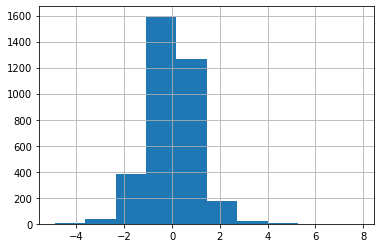

In [18]:
merged.error_std_dev.hist()

<AxesSubplot:>

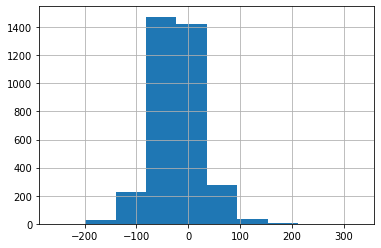

In [19]:
merged.naive_diff.hist()

2248.5867317633542
2249.0


<AxesSubplot:>

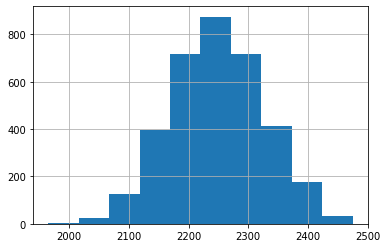

In [27]:
print(merged.r_all_rs_third.mean())
print(merged.r_all_rs_third.median())
merged.r_all_rs_third.hist()

2227.913555427915
2227.0


<AxesSubplot:>

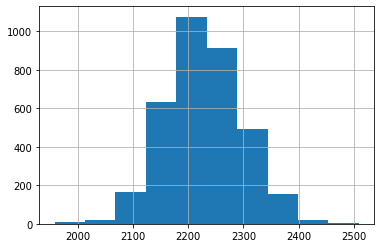

In [28]:
print(merged.r_all_rs_fourth.mean())
print(merged.r_all_rs_fourth.median())

merged.r_all_rs_fourth.hist()

In [25]:
import statsmodels.formula.api as smf

# Let's see how well the third grade score predicts
# the fourth grade score
model = smf.ols("""
    r_all_rs_third ~ r_all_rs_fourth
""", data=merged)

results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         r_all_rs_third   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     6410.
Date:                Mon, 09 Aug 2021   Prob (F-statistic):               0.00
Time:                        12:28:19   Log-Likelihood:                -18400.
No. Observations:                3501   AIC:                         3.680e+04
Df Residuals:                    3499   BIC:                         3.682e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         217.0766     25.386      8.551      0.000     167.304     266.849
r_all_rs_fourth     0.9119      0.011     80.061      0.000       0.890       0.934
==============================================================================
Omnibus:                      339.591   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1204.709
Skew:                          -0.455   Prob(JB):                    2.52e-262
Kurtosis:                       5.726   Cond. No.                     7.22e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
# Compute the STANDARD DEVIATION OF THE ERROR!!!!
# residual = how wrong your prediction was
#     very high or low residual = probably cheating sometime
# standard deviation = "if we have a bunch of numbers, how weird is a given number?"
merged['error_std_dev_third'] = results.resid / np.sqrt(results.mse_resid)
merged.head()

,CNAME_fourth,r_all_rs_fourth,r_all_rs_third,predicted_fourth,residual,error_std_dev,error_std_dev_third
CAMPUS,,,,,,,
1902103,CAYUGA EL,2392.0,2330.0,2285.616126,106.383874,2.600187,-1.471090
1903101,ELKHART EL,2263.0,2285.0,2253.692715,9.307285,0.227484,0.094676
1904102,FRANKSTON EL,2242.0,2299.0,2263.624443,-21.624443,-0.528535,0.809311
1906102,NECHES EL,2218.0,2236.0,2218.931668,-0.931668,-0.022771,-0.077066
1907110,STORY EL,2200.0,2202.0,2194.811757,5.188243,0.126809,-0.456203


In [27]:
# If sort by error_std_dev, we are answering the question
# "these are the most weird scores" - whether high or low
# and anything over.... 2? is kind of weird? or worth looking at.
merged.sort_values(by='error_std_dev_third', ascending=False)

,CNAME_fourth,r_all_rs_fourth,r_all_rs_third,predicted_fourth,residual,error_std_dev,error_std_dev_third
CAMPUS,,,,,,,
139908101,ROXTON EL,2130.0,2388.0,2326.761855,-196.761855,-4.809164,4.929698
105802041,SAN MARCOS PREP,2025.0,2245.0,2225.316350,-200.316350,-4.896042,3.910961
90905101,GRANDVIEW-HOPKI,2149.0,2346.0,2296.966672,-147.966672,-3.616535,3.650748
108912110,JOSE DE ESCANDO,2166.0,2360.0,2306.898400,-140.898400,-3.443775,3.618377
226903111,FT CONCHO EL,2196.0,2386.0,2325.343037,-129.343037,-3.161344,3.589150
...,...,...,...,...,...,...,...
57825001,PINNACLE SCHOOL,2274.0,2068.0,2099.750934,174.249066,4.258917,-4.799706
101912172,HENDERSON N EL,2324.0,2093.0,2117.486162,206.513838,5.047518,-5.243651
15803101,HIGGS/CARTER/KI,2349.0,2097.0,2120.323799,228.676201,5.589200,-5.648870


In [36]:
merged.head()

,CNAME_fourth,r_all_rs_fourth,r_all_rs_third,CNAME_third_2004,r_all_rs_third_2004
CAMPUS,,,,,
1902103,CAYUGA EL,2392.0,2330.0,CAYUGA EL,2410.0
1903101,ELKHART EL,2263.0,2285.0,ELKHART EL,2256.0
1904102,FRANKSTON EL,2242.0,2299.0,FRANKSTON EL,2284.0
1906102,NECHES EL,2218.0,2236.0,NECHES EL,2294.0
1907110,STORY EL,2200.0,2202.0,STORY EL,2256.0


In [37]:
import statsmodels.formula.api as smf

# Let's see how well the third grade score predicts
# the fourth grade score
model = smf.ols("""
    r_all_rs_fourth ~ r_all_rs_third_2004
""", data=merged)

results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        r_all_rs_fourth   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     3311.
Date:                Mon, 09 Aug 2021   Prob (F-statistic):               0.00
Time:                        12:31:48   Log-Likelihood:                -18505.
No. Observations:                3482   AIC:                         3.701e+04
Df Residuals:                    3480   BIC:                         3.703e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             507.1965     29.917     16.953      0.000     448.540     565.853
r_all_rs_third_2004     0.7565      0.013     57.538      0.000       0.731       0.782
==============================================================================
Omnibus:                      181.744   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              588.818
Skew:                          -0.183   Prob(JB):                    1.38e-128
Kurtosis:                       4.981   Cond. No.                     8.17e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
merged['error_std_dev'] = results.resid / np.sqrt(results.mse_resid)
merged.sort_values(by='error_std_dev', ascending=False)

,CNAME_fourth,r_all_rs_fourth,r_all_rs_third,CNAME_third_2004,r_all_rs_third_2004,error_std_dev
CAMPUS,,,,,,
57905115,HARRELL BUDD EL,2470.0,2140.0,HARRELL BUDD EL,2160.0,6.683622
15803101,HIGGS/CARTER/KI,2349.0,2097.0,HIGGS/CARTER/KI,2113.0,4.946679
24801101,ENCINO SCHOOL,2328.0,2230.0,ENCINO SCHOOL,2093.0,4.827348
131001103,SARITA EL,2509.0,2424.0,SARITA EL,2355.0,4.477696
206903101,CHEROKEE ELEMEN,2334.0,2362.0,CHEROKEE ELEMEN,2170.0,3.765205
...,...,...,...,...,...,...
15815101,RADIANCE ACADEM,2060.0,2122.0,RADIANCE ACADEM,2341.0,-4.434377
101912103,ALLEN EL,2101.0,2159.0,ALLEN EL,2398.0,-4.477472
57920108,WILMER EL,2168.0,2240.0,WILMER EL,2501.0,-4.699424


In [47]:
merged.head()

,CNAME_fourth,r_all_rs_fourth,r_all_rs_third,CNAME_third_2004,r_all_rs_third_2004,error_std_dev
CAMPUS,,,,,,
1902103,CAYUGA EL,2392.0,2330.0,CAYUGA EL,2410.0,1.253501
1903101,ELKHART EL,2263.0,2285.0,ELKHART EL,2256.0,0.999387
1904102,FRANKSTON EL,2242.0,2299.0,FRANKSTON EL,2284.0,0.141908
1906102,NECHES EL,2218.0,2236.0,NECHES EL,2294.0,-0.499750
1907110,STORY EL,2200.0,2202.0,STORY EL,2256.0,-0.281291


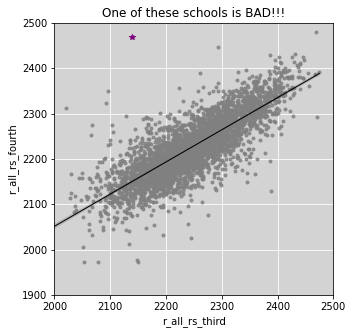

In [58]:
# 57905115	HARRELL BUDD EL	2470.0	2140.0	HARRELL BUDD EL	2160.0	6.683622

# Tell matplotlib to make an empty graphic
fig, ax = plt.subplots(figsize=(5,5))

# Set some options on it
ax.set_xlim(2000, 2500)
ax.set_ylim(1900, 2500)
ax.set_facecolor('lightgrey')
ax.grid(True, color='white')
ax.set_axisbelow(True)
ax.set_title("One of these schools is BAD!!!")

# Draw a graph inside of that empty graph space
sns.regplot(x='r_all_rs_third',
            y='r_all_rs_fourth',
            data=merged,
            marker='.',
            line_kws={'color': 'black', 'linewidth': 1 },
            scatter_kws={'color': 'grey'},
            ax=ax)

# Draw another graph ON TOP OF the existing graph
#plt.plot(2140, 2470, color='red', marker='o')

# or! we can pull out of datapoint
highlight = merged.loc[57905115]
plt.plot(highlight.r_all_rs_third, highlight.r_all_rs_fourth, color='purple', marker='*')


In [59]:
merged.loc[57905115]

CNAME_fourth           HARRELL BUDD EL
r_all_rs_fourth                 2470.0
r_all_rs_third                  2140.0
CNAME_third_2004       HARRELL BUDD EL
r_all_rs_third_2004             2160.0
predicted_fourth           2150.783703
residual2                   319.216297
residual                    319.216297
error_std_dev                 7.822765
naive_diff                       330.0
Name: 57905115, dtype: object